In [4]:
import sys
sys.path.insert(0, '/Users/lunderman/Documents/GitHub/LMP19')
import LMP19
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF,WhiteKernel

In [5]:
gamma = [5]
func = LMP19.Models.FuQu(gamma).eval 

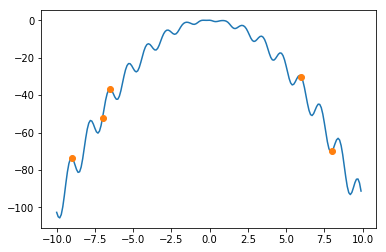

In [6]:
lb , ub = -10,10
bounds = [[lb,ub]]
dt = 0.1

xx = np.arange(lb,ub,dt)
xx = xx.reshape((len(xx),1))
yy= func(xx)

nPts = 5
X = np.array([-9,-7,-6.5,6,8])
X = X.reshape((nPts,1))
y = func(X)
plt.plot(xx,yy)
plt.plot(X,y,'o')
plt.show()

In [ ]:
# Define GP
GP = GPR(kernel = 1.0**2*RBF(np.var(X))+1.0**2*WhiteKernel(np.std(y)),normalize_y=True,n_restarts_optimizer=50).fit(X,y)

# View GP
Y_hat,sigma = GP.predict(xx,return_std=True)
plt.fill_between(np.ravel(xx),np.ravel(Y_hat)-2*sigma,np.ravel(Y_hat)+2*sigma,alpha=0.2)
plt.plot(xx,np.ravel(Y_hat))
plt.plot(X,y,'o')
plt.show()

In [ ]:
# Initialize the GBO Object
GBO = LMP19.Estimation.GBO(func,1,X,y,bounds)

In [ ]:
# Run GBO for set number of iterations
nSteps = 20
ii = np.argmax(GBO.y)
s=7
for kk in range(nSteps):
    GBO.GP = GP
    GBO.Expected_Improvement()
    print('=============================================')
    print('=============================================')
    print('Step ',kk)
    EI_yy = []
    for val in xx:
        EI_yy.append(-GBO.EI(val))
    plt.plot(xx,EI_yy)
    plt.plot(GBO.X[-1,:],-GBO.EI(GBO.X[-1,:]),'o',color='C2',label='Selected Maximizer')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Expected Improvement')
    plt.show()
    
    Y_hat,sigma = GBO.GP.predict(xx,return_std=True)
    plt.fill_between(np.ravel(xx),np.ravel(Y_hat)-2*sigma,np.ravel(Y_hat)+2*sigma,alpha=0.2)
    plt.plot(xx,np.ravel(Y_hat))
    plt.plot(GBO.X[:-1,:],GBO.y[:-1,:],'o',color='C1',label='Observations')
    plt.plot(GBO.X[-1,:],GBO.y[-1,:],'o',color='C2',label='EI Maximizer')
    
    tmp = np.argmax(GBO.y)
    if tmp == ii:
        s += 2
    else:
        ii = tmp
        s = 7
    
    plt.plot(GBO.X[ii,:],GBO.y[ii,0],'o',markersize=s,color='C3',label='Maximizer')
    plt.title('Gaussian Process')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [ ]:
plt.plot(np.arange(nSteps),[np.max(GBO.y[:nPts+kk,0]) for kk in range(nSteps)])
plt.ylabel('Max y value')
plt.xlabel('Iteration')
plt.show()